# Importing libraries that is required for analysis 

In [33]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf
import warnings 
warnings.filterwarnings('ignore')

# Splitting dataset into training and testing 

In [43]:
#Splitting dataset into training and testing 
#split the feature values and target values based on the dataset
(feature_train_data, target_y_values), (feature_test_values, target_test_values) = mnist.load_data()
print(feature_train_data.shape, target_y_values.shape)

(60000, 28, 28) (60000,)


# Visualizations

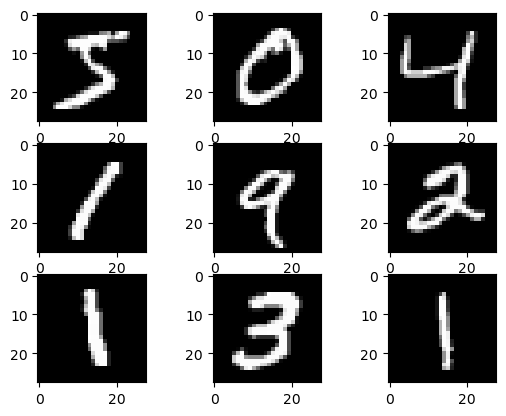

In [44]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(feature_train_data[i], cmap=plt.get_cmap('gray'))
plt.show()

# Data Normalization and standardarization of dataset

In [45]:
feature_train_data = feature_train_data.reshape(feature_train_data.shape[0], 28, 28, 1)
feature_test_values = feature_test_values.reshape(feature_test_values.shape[0], 28, 28, 1)
Data_shape = (28, 28, 1)

# Converting class vectors into binary matrics class

In [46]:
from tensorflow.keras.utils import to_categorical
target_y_values = to_categorical(target_y_values, 10)
target_test_values = to_categorical(target_test_values, 10)

# Changing the type of feature train and feature test values 

In [47]:
feature_train_data = feature_train_data.astype('float32')
feature_test_values = feature_test_values.astype('float32')
feature_train_data /= 255
feature_test_values /= 255

# Exploring dataset that will be used for performing the training 

In [48]:
print('feature_train_data shape:', feature_train_data.shape)
print(feature_train_data.shape[0], 'train samples')
print(feature_test_values.shape[0], 'test samples')

feature_train_data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Designing machine learning mnist_model for mnist dataset

In [49]:
mnist_model = Sequential()
mnist_model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=Data_shape))
mnist_model.add(MaxPooling2D(pool_size=(2, 2)))
mnist_model.add(Conv2D(64, (3, 3), activation='relu'))
mnist_model.add(MaxPooling2D(pool_size=(2, 2)))
mnist_model.add(Flatten())
mnist_model.add(Dense(128, activation='relu'))
mnist_model.add(Dropout(0.3))
mnist_model.add(Dense(64, activation='relu'))
mnist_model.add(Dropout(0.5))
mnist_model.add(Dense(10, activation='softmax'))

# Model summary

In [50]:
mnist_model.summary() #model summary 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

# Compilation and training of model using training data

In [51]:
mnist_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

# Model training 

In [52]:
hist = mnist_model.fit(feature_train_data, target_y_values,batch_size=128,epochs=10,verbose=1,validation_data=(feature_test_values, target_test_values))
print("The mnist_model trained successfully")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 793us/sample - loss: 0.3889 - acc: 0.8809 - val_loss: 0.0627 - val_acc: 0.9813
Epoch 2/10
60000/60000 [==============================] - 27s 444us/sample - loss: 0.1125 - acc: 0.9701 - val_loss: 0.0415 - val_acc: 0.9882
Epoch 3/10
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0791 - acc: 0.9798 - val_loss: 0.0343 - val_acc: 0.9902
Epoch 4/10
60000/60000 [==============================] - 24s 406us/sample - loss: 0.0618 - acc: 0.9836 - val_loss: 0.0303 - val_acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 31s 509us/sample - loss: 0.0536 - acc: 0.9861 - val_loss: 0.0329 - val_acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 21s 346us/sample - loss: 0.0445 - acc: 0.9885 - val_loss: 0.0268 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 22s 369us/sample - loss: 0.0405 - acc: 0.9897 

# Model evaluation

In [53]:
model_scores = mnist_model.evaluate(feature_test_values, target_test_values, verbose=0)
print('Test loss:', model_scores[0])
print('Test accuracy:', model_scores[1])

Test loss: 0.028619782818992193
Test accuracy: 0.9926


# Accuracy curves and model evaluation 

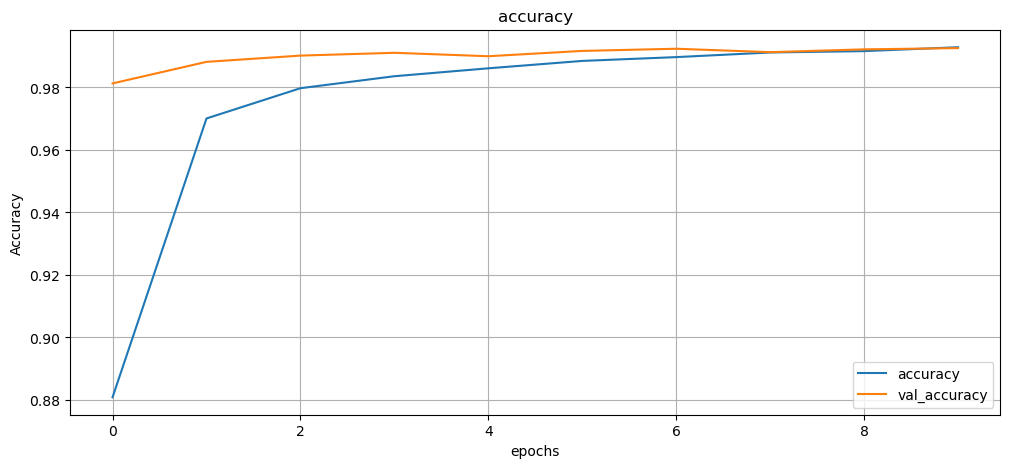

In [57]:
#Accuracy curves 
fig = plt.figure(figsize = (12,5))
plt.plot(hist.history['acc'], label = 'accuracy')
plt.plot(hist.history['val_acc'], label = 'val_accuracy')
plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('accuracy')
plt.show()

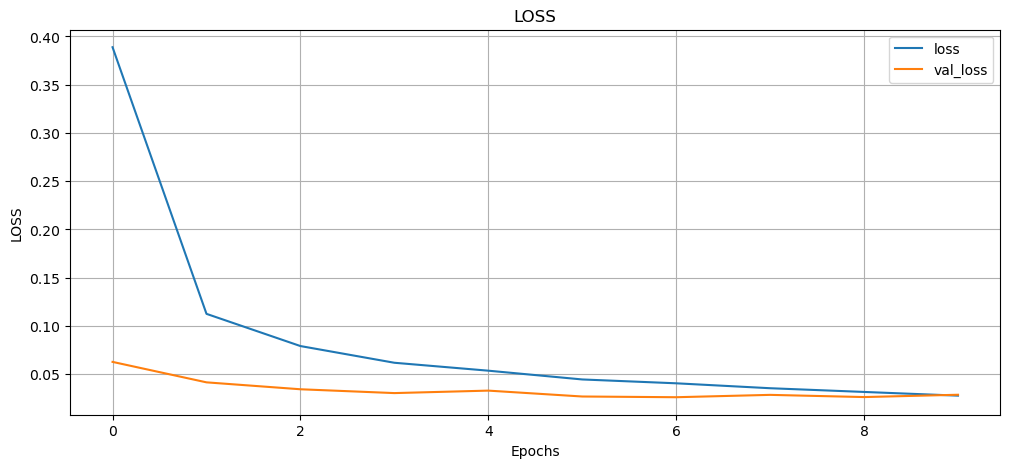

In [58]:
#Loss 
fig = plt.figure(figsize = (12,5))
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.title('LOSS')
plt.show()

# Saving models

In [62]:
mnist_model.save('new_digit_mnist.h5')
print("Saving the mnist_model as new_digit_mnist.h5")

Saving the mnist_model as new_digit_mnist.h5


# Designing GUI for predicting the digits 

# Importing library for designing GUI  

In [60]:
from tensorflow.keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

# Loading model that is designed 

In [64]:
mnist_model= load_model('new_digit_mnist.h5')

# Getting images at real time through GUI and converting that can be used for model training 

In [98]:
def digit_prediction_mnist(images):
    images = images.resize((28,28))
    images = images.convert('L')
    images = np.array(images)
    images = images.reshape(1,28,28,1)
    images = images/255.0
    pred_result = mnist_model.predict([images])[0]
    return np.argmax(pred_result), max(pred_result)

In [99]:
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=600, height=600, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="DRAW", bg = "white", font=("Times New Roman", 48))
        self.classify_btn = tk.Button(self, text = "Predict", command = self.classify_handwriting)   
        self.button_clear = tk.Button(self, text = "Clear text", command = self.clear_all)
       
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()  # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas
        a,b,c,d = rect
        rect=(a+4,b+4,c-4,d-4)
        im = ImageGrab.grab(rect)

        digit, acc = digit_prediction_mnist(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
       
app = App()
mainloop()